In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split #percentage split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Membaca dataset
df = pd.read_excel('/content/drive/MyDrive/Skripsi_Bismillah/Data Skripsi Survival/colorectal_survival.xlsx')

In [ ]:
#Cetak isi dataset csv
df

,Age,Sex,MStatus,Edu_status,Family_history,Alcohol,Tobacco,Imaging,Location,Hist_type,...,Liver,Lung,Peritonuem,VSTATUS,TIME,statusfn,Chemotherapy,Surgery,Radiotherapy,survive
0,72,0,2,1,0,1,0,1,1,1,...,0,1,0,0,27,0,1,1,0,1
1,50,1,1,1,0,0,0,1,1,1,...,0,0,0,0,14,0,1,0,0,0
2,33,1,1,1,0,0,0,1,1,1,...,0,0,0,0,16,0,1,0,0,0
3,65,0,2,1,0,0,0,1,1,1,...,0,0,0,0,57,0,1,1,0,1
4,55,1,2,2,0,0,0,1,1,1,...,1,0,0,0,9,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,63,0,2,3,0,0,0,1,1,1,...,0,0,0,0,16,0,1,1,0,0
157,32,1,1,3,0,0,0,1,3,1,...,1,0,0,1,7,1,1,1,0,0
158,58,0,2,4,0,0,0,1,2,1,...,0,0,0,0,44,0,1,1,0,1
159,59,1,2,1,0,0,0,1,1,1,...,0,0,0,1,11,1,0,1,0,0


In [ ]:
df.shape
#Hasilnya (jumlah data, jumlah features) atau (jumlah baris, jumlah kolom)

(161, 28)

In [ ]:
#Membaca 5 data teratas
df.head()

,Age,Sex,MStatus,Edu_status,Family_history,Alcohol,Tobacco,Imaging,Location,Hist_type,...,Liver,Lung,Peritonuem,VSTATUS,TIME,statusfn,Chemotherapy,Surgery,Radiotherapy,survive
0,72,0,2,1,0,1,0,1,1,1,...,0,1,0,0,27,0,1,1,0,1
1,50,1,1,1,0,0,0,1,1,1,...,0,0,0,0,14,0,1,0,0,0
2,33,1,1,1,0,0,0,1,1,1,...,0,0,0,0,16,0,1,0,0,0
3,65,0,2,1,0,0,0,1,1,1,...,0,0,0,0,57,0,1,1,0,1
4,55,1,2,2,0,0,0,1,1,1,...,1,0,0,0,9,0,1,0,0,0


In [ ]:
#Membaca 5 data terbawah
df.tail()

,Age,Sex,MStatus,Edu_status,Family_history,Alcohol,Tobacco,Imaging,Location,Hist_type,...,Liver,Lung,Peritonuem,VSTATUS,TIME,statusfn,Chemotherapy,Surgery,Radiotherapy,survive
156,63,0,2,3,0,0,0,1,1,1,...,0,0,0,0,16,0,1,1,0,0
157,32,1,1,3,0,0,0,1,3,1,...,1,0,0,1,7,1,1,1,0,0
158,58,0,2,4,0,0,0,1,2,1,...,0,0,0,0,44,0,1,1,0,1
159,59,1,2,1,0,0,0,1,1,1,...,0,0,0,1,11,1,0,1,0,0
160,60,0,2,1,0,0,0,1,1,1,...,0,0,0,1,12,1,1,1,0,0


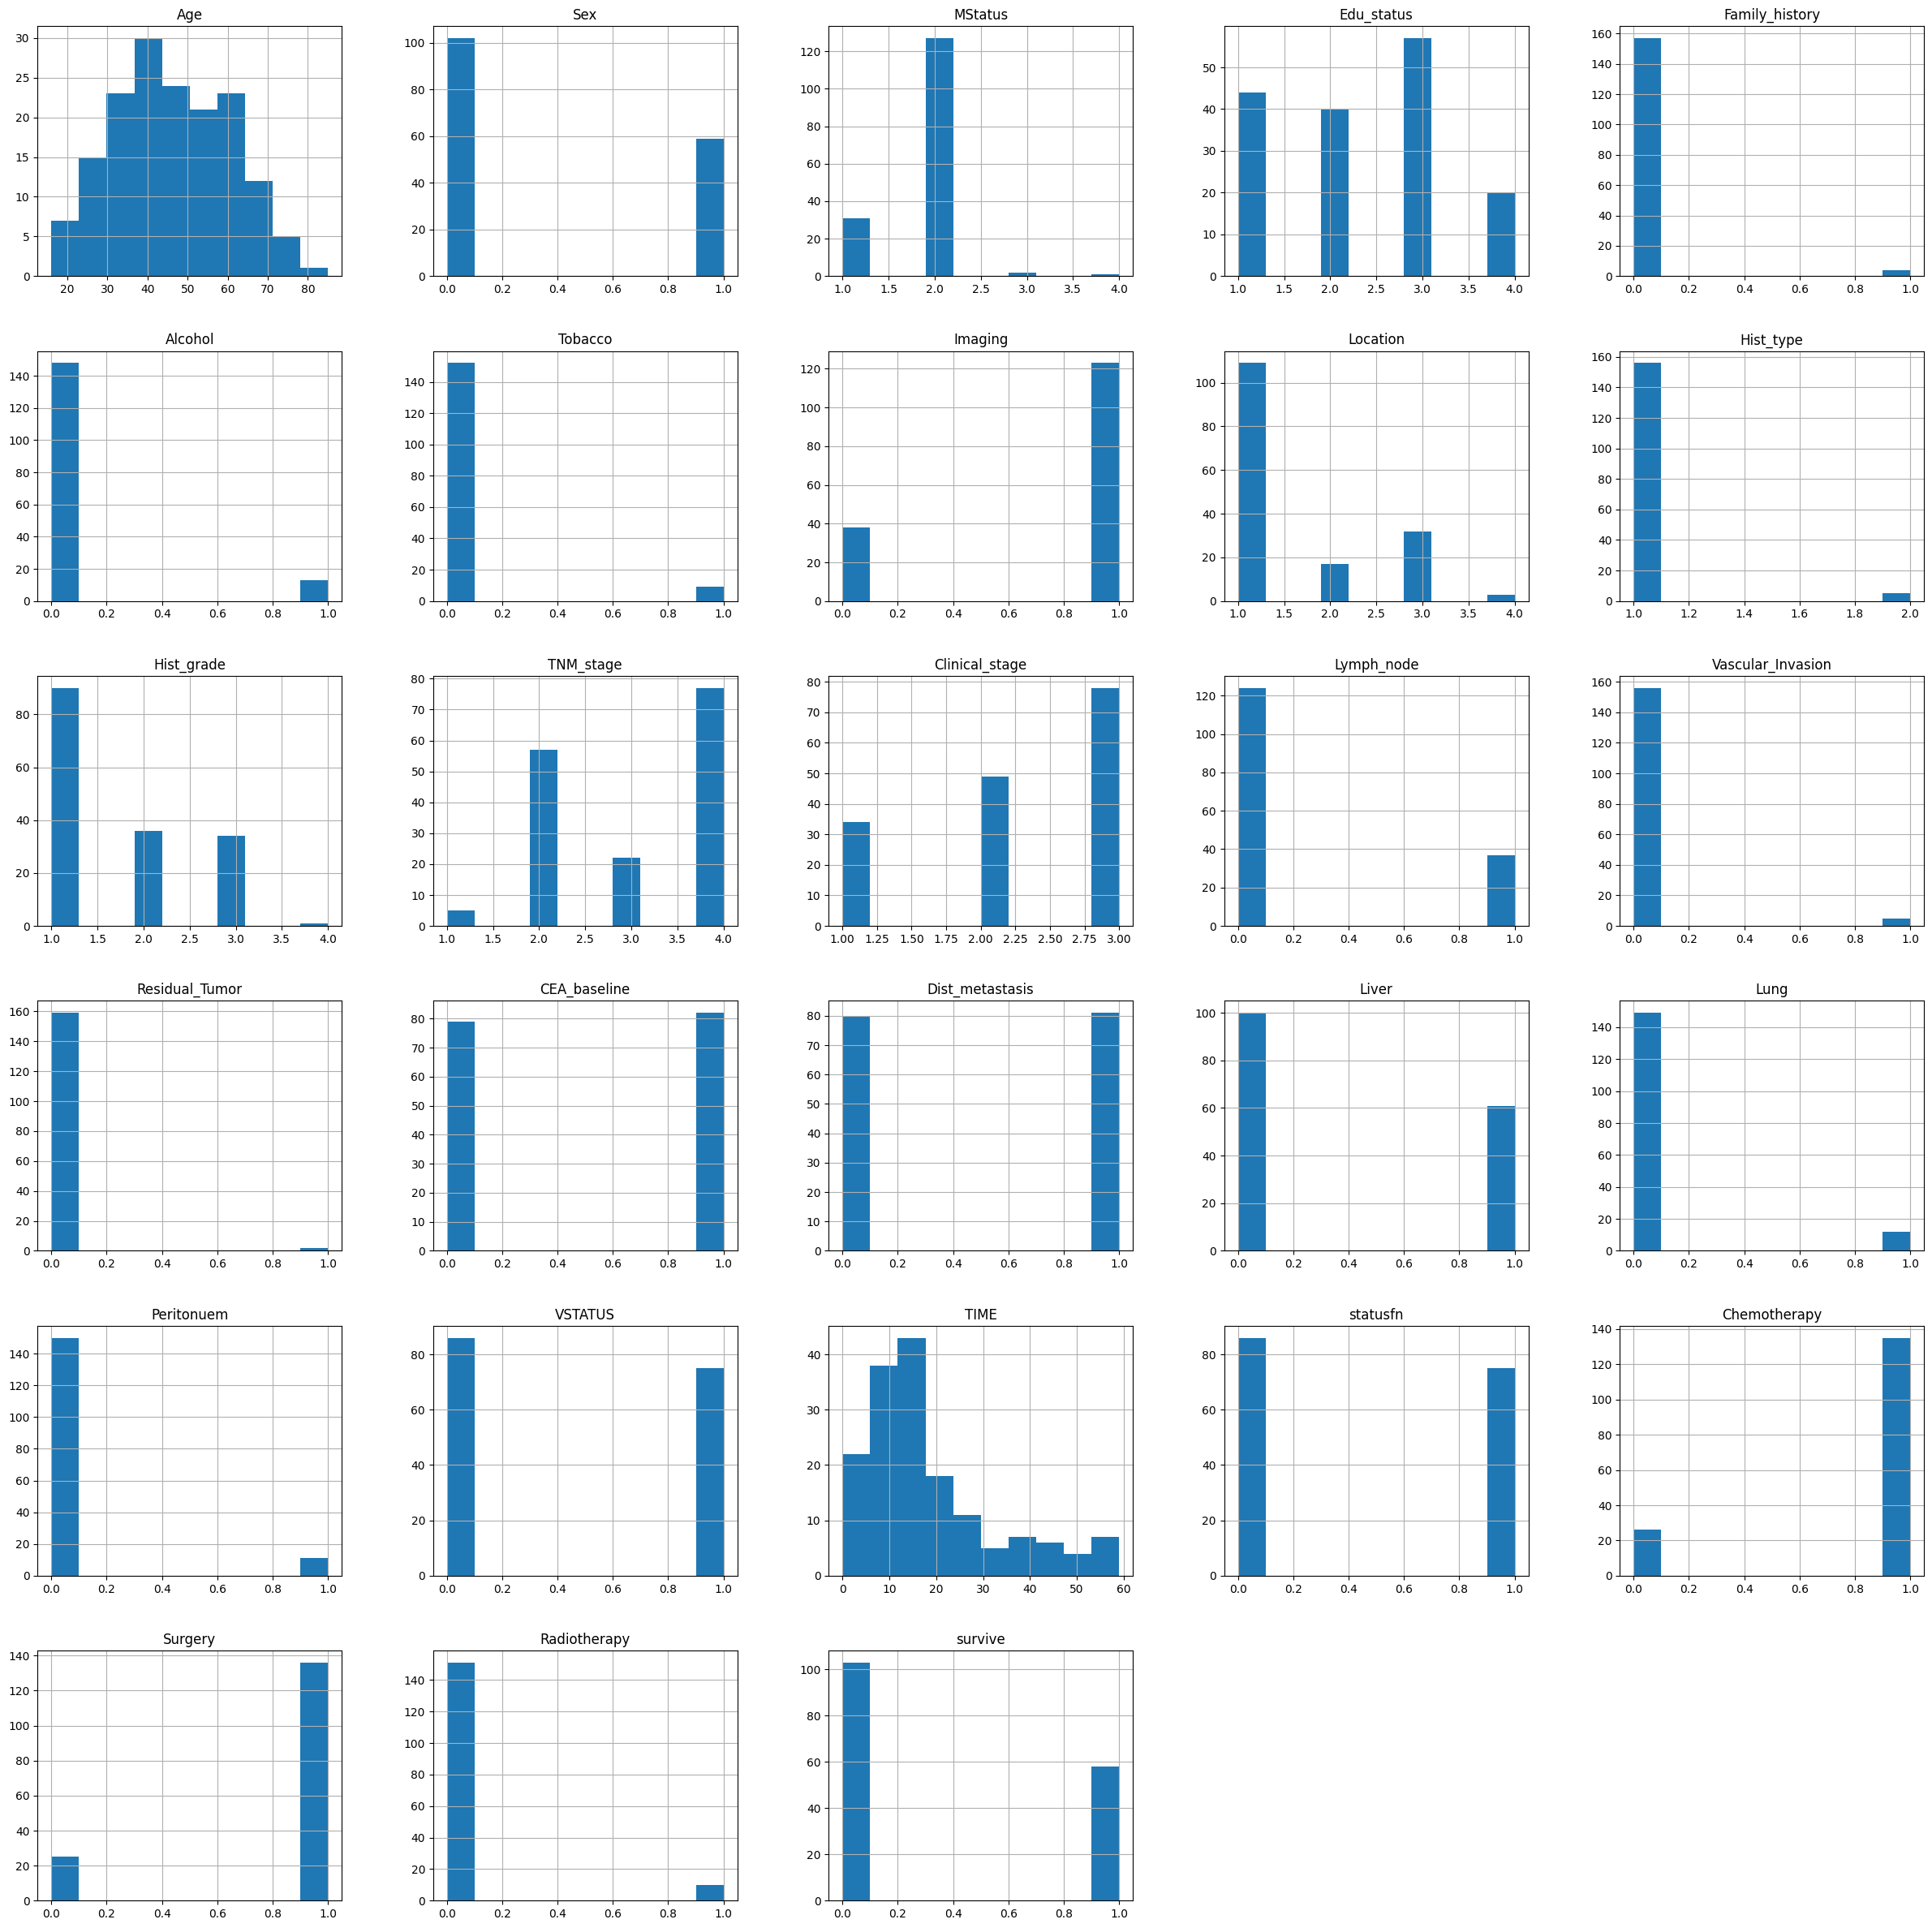

In [ ]:
#Visualisasi dari tiap variabel data
df.hist(bins=10, figsize=(30,30))
plt.show()

In [ ]:
X = df.drop(columns=['survive'])
y = df['survive']

In [ ]:
#Mengecek apa ada missing value atau noise
df.isnull().sum()

Age                  0
Sex                  0
MStatus              0
Edu_status           0
Family_history       0
Alcohol              0
Tobacco              0
Imaging              0
Location             0
Hist_type            0
Hist_grade           0
TNM_stage            0
Clinical_stage       0
Lymph_node           0
Vascular_Invasion    0
Residual_Tumor       0
CEA_baseline         0
Dist_metastasis      0
Liver                0
Lung                 0
Peritonuem           0
VSTATUS              0
TIME                 0
statusfn             0
Chemotherapy         0
Surgery              0
Radiotherapy         0
survive              0
dtype: int64

In [ ]:
#Melihat tipe data yang digunakan dari masing-masing variabel pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                161 non-null    int64
 1   Sex                161 non-null    int64
 2   MStatus            161 non-null    int64
 3   Edu_status         161 non-null    int64
 4   Family_history     161 non-null    int64
 5   Alcohol            161 non-null    int64
 6   Tobacco            161 non-null    int64
 7   Imaging            161 non-null    int64
 8   Location           161 non-null    int64
 9   Hist_type          161 non-null    int64
 10  Hist_grade         161 non-null    int64
 11  TNM_stage          161 non-null    int64
 12  Clinical_stage     161 non-null    int64
 13  Lymph_node         161 non-null    int64
 14  Vascular_Invasion  161 non-null    int64
 15  Residual_Tumor     161 non-null    int64
 16  CEA_baseline       161 non-null    int64
 17  Dist_metastasis 

In [ ]:
#Import Library
from sklearn.svm import SVC

In [ ]:
#Aktivasi fungsi classifier SVM
svm = SVC(kernel='rbf')

# **K-FOLD 2**

In [ ]:
kf2 = KFold(n_splits=2)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf2.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here


In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions2 = svm.predict(X_test)
accuracy2 = accuracy_score(y_test, predictions2)

In [ ]:
print("Akurasi Menggunakan k=2", accuracy2)

Akurasi Menggunakan k=2 0.9625


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[103   0]
 [ 10  48]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.86      0.92        21

    accuracy                           0.96        80
   macro avg       0.98      0.93      0.95        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
kinerja2 = precision_recall_fscore_support(y_test, predictions2)
kinerja2

(array([0.9516129, 1.       ]),
 array([1.        , 0.85714286]),
 array([0.97520661, 0.92307692]),
 array([59, 21]))

# **K-FOLD 3**

In [ ]:
kf3 = KFold(n_splits=3)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf3.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions3 = svm.predict(X_test)
accuracy3 = accuracy_score(y_test, predictions3)

In [ ]:
print("Akurasi Menggunakan k=3", accuracy3)

Akurasi Menggunakan k=3 0.9433962264150944


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[103   0]
 [  7  51]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.80      0.89        15

    accuracy                           0.94        53
   macro avg       0.96      0.90      0.93        53
weighted avg       0.95      0.94      0.94        53



In [ ]:
kinerja3 = precision_recall_fscore_support(y_test, predictions3)
kinerja3

(array([0.92682927, 1.        ]),
 array([1. , 0.8]),
 array([0.96202532, 0.88888889]),
 array([38, 15]))

# **K-FOLD 4**

In [ ]:
kf4 = KFold(n_splits=4)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf4.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions4 = svm.predict(X_test)
accuracy4 = accuracy_score(y_test, predictions4)

In [ ]:
print("Akurasi Menggunakan k=4", accuracy4)

Akurasi Menggunakan k=4 0.9


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[101   2]
 [  7  51]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.85      0.85      0.85        13

    accuracy                           0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



In [ ]:
kinerja4 = precision_recall_fscore_support(y_test, predictions4)
kinerja4

(array([0.92592593, 0.84615385]),
 array([0.92592593, 0.84615385]),
 array([0.92592593, 0.84615385]),
 array([27, 13]))

# **K-FOLD 5**

In [ ]:
kf5 = KFold(n_splits=5)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf5.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions5 = svm.predict(X_test)
accuracy5 = accuracy_score(y_test, predictions5)

In [ ]:
print("Akurasi Menggunakan k=5", accuracy5)

Akurasi Menggunakan k=5 0.90625


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[101   2]
 [  4  54]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.82      0.90      0.86        10

    accuracy                           0.91        32
   macro avg       0.89      0.90      0.89        32
weighted avg       0.91      0.91      0.91        32



In [ ]:
kinerja5 = precision_recall_fscore_support(y_test, predictions5)
kinerja5

(array([0.95238095, 0.81818182]),
 array([0.90909091, 0.9       ]),
 array([0.93023256, 0.85714286]),
 array([22, 10]))

# **K-FOLD 6**

In [ ]:
kf6 = KFold(n_splits=6)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf6.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions6 = svm.predict(X_test)
accuracy6 = accuracy_score(y_test, predictions6)

In [ ]:
print("Akurasi Menggunakan k=6", accuracy6)

Akurasi Menggunakan k=6 0.9615384615384616


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[102   1]
 [  7  51]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions6))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.88      0.93         8

    accuracy                           0.96        26
   macro avg       0.97      0.94      0.95        26
weighted avg       0.96      0.96      0.96        26



In [ ]:
kinerja6 = precision_recall_fscore_support(y_test, predictions6)
kinerja6

(array([0.94736842, 1.        ]),
 array([1.   , 0.875]),
 array([0.97297297, 0.93333333]),
 array([18,  8]))

# **K-FOLD 7**

In [ ]:
kf7 = KFold(n_splits=7)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf7.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions7 = svm.predict(X_test)
accuracy7 = accuracy_score(y_test, predictions7)

In [ ]:
print("Akurasi Menggunakan k=7", accuracy7)

Akurasi Menggunakan k=7 0.9565217391304348


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[102   1]
 [  5  53]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions7))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.88      0.93         8

    accuracy                           0.96        23
   macro avg       0.97      0.94      0.95        23
weighted avg       0.96      0.96      0.96        23



In [ ]:
kinerja7 = precision_recall_fscore_support(y_test, predictions7)
kinerja7

(array([0.9375, 1.    ]),
 array([1.   , 0.875]),
 array([0.96774194, 0.93333333]),
 array([15,  8]))

# **K-FOLD 8**

In [ ]:
kf8 = KFold(n_splits=8)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf8.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions8 = svm.predict(X_test)
accuracy8 = accuracy_score(y_test, predictions8)

In [ ]:
print("Akurasi Menggunakan k=8", accuracy8)

Akurasi Menggunakan k=8 0.95


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[102   1]
 [  5  53]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions8))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
kinerja8 = precision_recall_fscore_support(y_test, predictions8)
kinerja8

(array([0.93333333, 1.        ]),
 array([1.        , 0.83333333]),
 array([0.96551724, 0.90909091]),
 array([14,  6]))

# **K-FOLD 9**

In [ ]:
kf9 = KFold(n_splits=9)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf9.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions9 = svm.predict(X_test)
accuracy9 = accuracy_score(y_test, predictions9)

In [ ]:
print("Akurasi Menggunakan k=9", accuracy9)

Akurasi Menggunakan k=9 0.9411764705882353


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[102   1]
 [  5  53]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions9))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.88      0.91        17
weighted avg       0.95      0.94      0.94        17



In [ ]:
kinerja9 = precision_recall_fscore_support(y_test, predictions9)
kinerja9

(array([0.92857143, 1.        ]),
 array([1.  , 0.75]),
 array([0.96296296, 0.85714286]),
 array([13,  4]))

# **K-FOLD 10**

In [ ]:
kf10 = KFold(n_splits=10)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf10.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions10 = svm.predict(X_test)
accuracy10 = accuracy_score(y_test, predictions10)

In [ ]:
print("Akurasi Menggunakan k=10", accuracy10)

Akurasi Menggunakan k=10 0.9375


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[103   0]
 [  4  54]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions10))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



In [ ]:
kinerja10 = precision_recall_fscore_support(y_test, predictions10)
kinerja10

(array([0.92307692, 1.        ]),
 array([1.  , 0.75]),
 array([0.96      , 0.85714286]),
 array([12,  4]))

In [ ]:
print(f'Tingkat akurasi SVM k-fold 2: {accuracy2 * 100}%')
print(f'Tingkat akurasi SVM k-fold 3: {accuracy3 * 100}%')
print(f'Tingkat akurasi SVM k-fold 4: {accuracy4 * 100}%')
print(f'Tingkat akurasi SVM k-fold 5: {accuracy5 * 100}%')
print(f'Tingkat akurasi SVM k-fold 6: {accuracy6 * 100}%')
print(f'Tingkat akurasi SVM k-fold 7: {accuracy7 * 100}%')
print(f'Tingkat akurasi SVM k-fold 8: {accuracy8 * 100}%')
print(f'Tingkat akurasi SVM k-fold 9: {accuracy9 * 100}%')
print(f'Tingkat akurasi SVM k-fold 10: {accuracy10 * 100}%')

Tingkat akurasi SVM k-fold 2: 96.25%
Tingkat akurasi SVM k-fold 3: 94.33962264150944%
Tingkat akurasi SVM k-fold 4: 90.0%
Tingkat akurasi SVM k-fold 5: 90.625%
Tingkat akurasi SVM k-fold 6: 96.15384615384616%
Tingkat akurasi SVM k-fold 7: 95.65217391304348%
Tingkat akurasi SVM k-fold 8: 95.0%
Tingkat akurasi SVM k-fold 9: 94.11764705882352%
Tingkat akurasi SVM k-fold 10: 93.75%
